# Objectif :
Améliorer le temps, le coût et la qualité de l’embauche dans le cadre d’un recrutement aléatoire. L’objectif est de minimiser le
temps et le coût de l’embauche et de maximiser la qualité de l’embauche. Vous
pouvez mettre en pratique ici les méthodes d’ANOVA, de corrélation et de régression linéaire multiple afin d’effectuer l’analyse prédictive avec cet ensemble de
données.

# Plan 
- (a) Présentation du problème et des objectifs de l’étude ;
- (b) Présentation des données, description rapide des données (nombre d’observations,
de variables, présence ou non de données manquantes, statistiques descriptives univariées et bivariées, etc.) ;
- (c) Préparation des données (recodages, normalisations, etc.) ;
- (d) Définition et estimation du modèle explicatif et/ou prédictif à partir des données ;
- (e) Évaluation, diagnostic et vérification de la qualité du modèle et affinage ;
- (f) Interprétation, bilan et conclusion.

In [4]:
# Importation des Packages.
import pandas as pd
#import skimpy
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import scipy
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
import statsmodels.stats.descriptivestats as ds
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OrdinalEncoder
import itertools
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [20]:
import warnings 
warnings.filterwarnings("ignore")

In [21]:
# Chargement de nos données.
df = pd.read_csv('Time-Cost-Quality of Hire.csv', 
                 sep=';')

In [22]:
# Visualisation de nos données de forme tabulaire. 
df.sample(5)

,Sl. No,Fiscal Year,Quarter,Department,Job Open Date,Hire Date,Job Title,Source of Hire,Type of Hire,PerformanceScore,Sex,Yearly PayScale (Yen),Cost of Hire,Time to Hire (Days),Quality of Hire,Engagement,Ramp Up Time,Culture Fit (%)
12,13,2018,2,IT,04/04/2018,05/05/2018,Sr. Network Engineer,LinkedIn,External,Fully Meets,F,768000,4000,31,70,96,26,95
62,63,2018,4,Production,11/11/2018,01/12/2018,Production Technician I,Career Portal,External,Fully Meets,F,174000,10000,20,94,36,70,87
34,35,2018,3,Marketing,07/08/2018,01/09/2018,Marketing Analyst,LinkedIn,External,Fully Meets,F,408000,4000,25,86,29,81,84
33,34,2018,3,Production,11/07/2018,01/08/2018,Production Technician I,Job Boards,External,PIP,F,419400,2625,21,85,39,83,82
45,46,2018,3,Sales,01/10/2018,03/11/2018,Sr. Sales Engineer,Agency,External,Fully Meets,F,768000,92160,33,88,41,100,87


## b) Présentation des données, description rapide des données (nombre d’observations, de variables, présence ou non de données manquantes, statistiques descriptives univariées et bivariées, etc.) 

- Cibles : Temps, coût et qualité d'embauche

In [23]:
# Information générale sur nos variables (Type, Obs et Col)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Sl. No                 64 non-null     int64 
 1   Fiscal Year            64 non-null     int64 
 2   Quarter                64 non-null     int64 
 3   Department             64 non-null     object
 4   Job Open Date          64 non-null     object
 5   Hire Date              64 non-null     object
 6   Job Title              64 non-null     object
 7   Source of Hire         64 non-null     object
 8   Type of Hire           64 non-null     object
 9   PerformanceScore       64 non-null     object
 10  Sex                    64 non-null     object
 11  Yearly PayScale (Yen)  64 non-null     int64 
 12  Cost of Hire           64 non-null     int64 
 13  Time to Hire (Days)    64 non-null     int64 
 14  Quality of Hire        64 non-null     int64 
 15  Engagement             64

In [24]:
# Présence de valeurs manquantes (%)
df.isna().mean() * 100


Sl. No                   0.0
Fiscal Year              0.0
Quarter                  0.0
Department               0.0
Job Open Date            0.0
Hire Date                0.0
Job Title                0.0
Source of Hire           0.0
Type of Hire             0.0
PerformanceScore         0.0
Sex                      0.0
Yearly PayScale (Yen)    0.0
Cost of Hire             0.0
Time to Hire (Days)      0.0
Quality of Hire          0.0
Engagement               0.0
Ramp Up Time             0.0
Culture Fit (%)          0.0
dtype: float64

In [25]:
# Statistiques describtives des variables "Quantitatives"
df.describe()

,Sl. No,Fiscal Year,Quarter,Yearly PayScale (Yen),Cost of Hire,Time to Hire (Days),Quality of Hire,Engagement,Ramp Up Time,Culture Fit (%)
count,64.000000,64.0,64.000000,6.400000e+01,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,32.500000,2018.0,2.703125,4.914450e+05,18032.500000,35.312500,79.437500,50.234375,76.812500,82.109375
std,18.618987,0.0,1.064278,2.074369e+05,31730.556101,13.033382,16.271384,21.767707,22.953282,12.812590
min,1.000000,2018.0,1.000000,1.680000e+05,2625.000000,20.000000,41.000000,26.000000,24.000000,47.000000
25%,16.750000,2018.0,2.000000,3.405000e+05,3656.250000,27.750000,81.500000,34.750000,67.250000,84.000000
50%,32.500000,2018.0,3.000000,4.773000e+05,10000.000000,31.000000,85.000000,41.000000,84.000000,85.000000
75%,48.250000,2018.0,4.000000,6.600000e+05,10000.000000,34.250000,89.000000,71.000000,91.250000,87.000000
max,64.000000,2018.0,4.000000,1.008000e+06,120960.000000,88.000000,94.000000,96.000000,105.000000,95.000000


## Variables Qualitatives
- Departement : Équipe réalisant l'embauche. 
- Job Open : Date de début de recherche d'un employé. 
- Hire Date : Date d'embauche ou date où le besoin a été rempli. 
- Job Title : Intitulé de la position. 
- Source of Hire : Canal par lequel l'employé a été trouvé. 
- Type of Hire : Fait que l'embauché soit connu de quelqu'un déjà à l'entreprise.  
- Performance Score : Fait que la personne replisse ou non les atteintes. 
- Sex : Genre de la personne embauché. 
## Variables Quantitatives 
- Sl.No : Nombre du salarié. Numéro de la ligne. 
- Fiscal Year : Année fiscale. 
- Quarter : Trimestre. 
- Yearly PayScale (Yen) : Salaire annuel en Yen.
- Cost of Hire : Coût de l'embauche. 
- TS: Temps que cela à pris d'embaucher la personne concerné.
- Quality of Hire :  Métrique de qualité de l'employé. 
- Engagement : Investissement personnel. 
- Ramp up Time : Temps de montée en puissance de l'employée. 
- Culture Fit (%) : Adaptation culturelle de l'employée. 
### Variables à changer de type : 
- Hire Date
- Job Open
### Pas d'intérêt à traiter : 
- Fiscal Year : Une seule modalité 


---

## Analyse Univarié Qualitatif
Hire Date et Job Open semblent être des variables qui ne sont pas catégorielles mais qui devrait \
être considérées comme quantitatives. Tout de même, elle semble être résumé par la durée d'embauche.\
A mon avis il existerait une certaine rédondance. 

In [26]:
df_quali = df.select_dtypes(include='object')
df_quali = df_quali.drop(columns = ['Hire Date','Job Open Date'])
df_quali.columns

Index(['Department', 'Job Title', 'Source of Hire', 'Type of Hire',
       'PerformanceScore', 'Sex'],
      dtype='object')

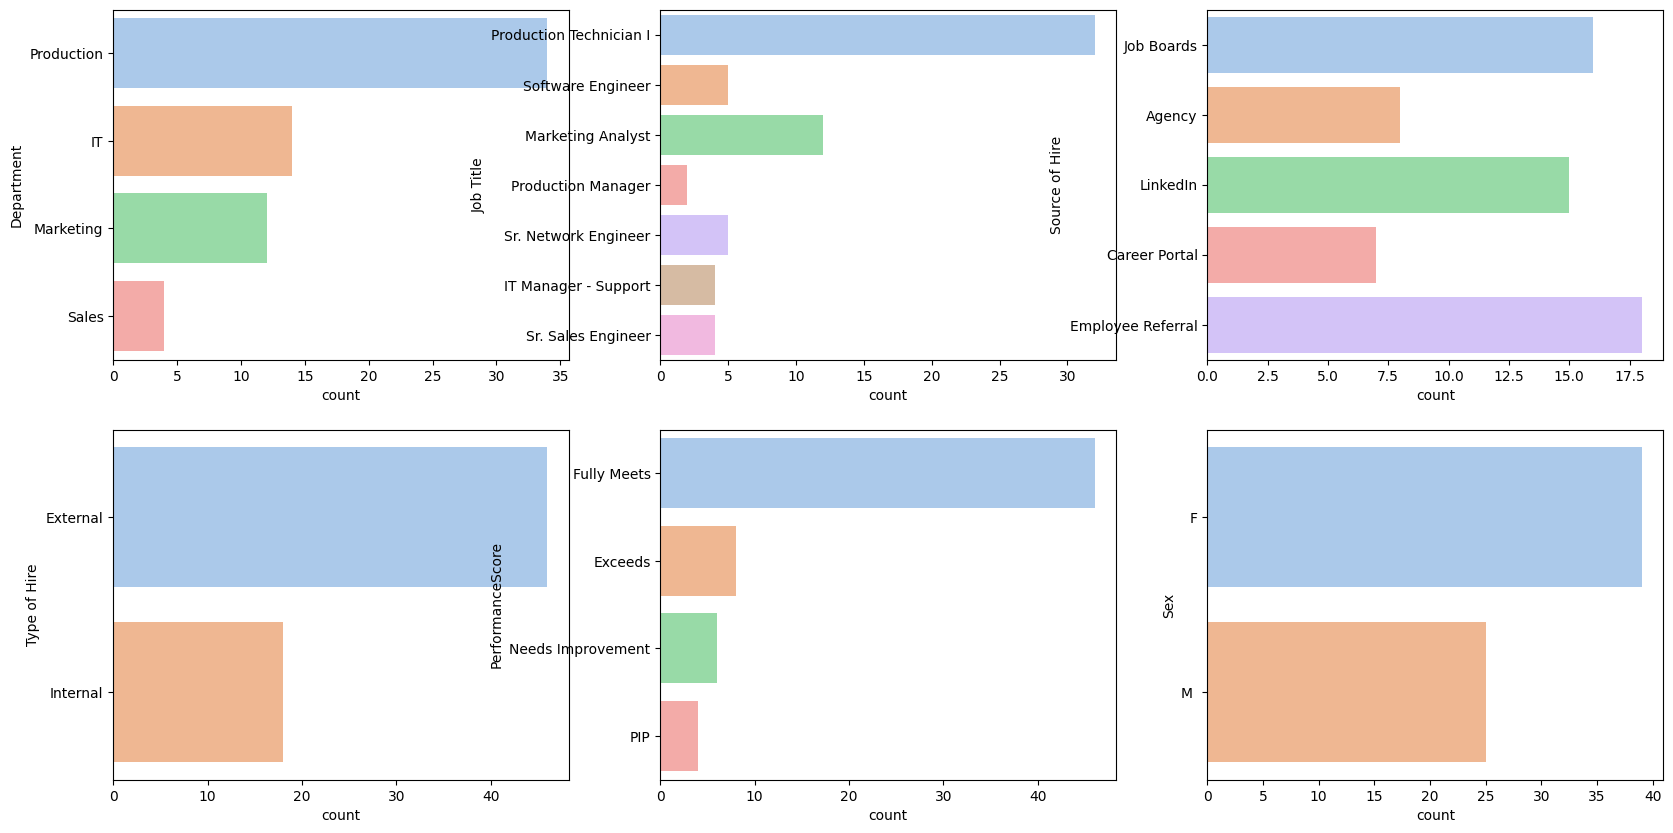

In [27]:
# Frequences des variables qualitatives
fig, ax = plt.subplots(2,3, figsize = (20,10))
for i, subplots in zip(df_quali.columns, ax.flatten()) :
    sns.countplot(df_quali[i], ax = subplots ,palette= 'pastel')
fig.show()

Dans ces graphiques nous voyons surtout les fréquences des valeurs que nos variables peuvent prendre.  Nous pouvons notamment nous rendre compte que la plupart de personnes ayant été embauchées dans notre période d'études à eu une performance qui remplit les attentes. 

La majorité des personnes étaient des femmes ou encore que la source de ces employés était dans la plupart les réferences personlles ou LinkedIn. Cependant dans la plupart, les employés proviennent de l'exterieur de l'entreprise. 

Le departement ayant eu le plus d'embauches est le département de production suivi par le departement IT.

## Analyse Univarié Quantitatif
Dans ces graphs nous nous rendons compte qu'ils existent des variables qui semblent être ordinales catégorielles. Celles-cis sont\
Quarter et Fiscal Year. Sl.Id présente un intérêt faible. 

In [28]:
df_quant = df.select_dtypes(include = int)
df_quant = df_quant.drop(columns= 'Fiscal Year')


In [29]:
df_quant_graphic = df_quant.drop(columns = ['Sl. No','Quarter'])
df_quant_graphic.columns


Index(['Yearly PayScale (Yen)', 'Cost of Hire', 'Time to Hire (Days)',
       'Quality of Hire', 'Engagement', 'Ramp Up Time', 'Culture Fit (%)'],
      dtype='object')

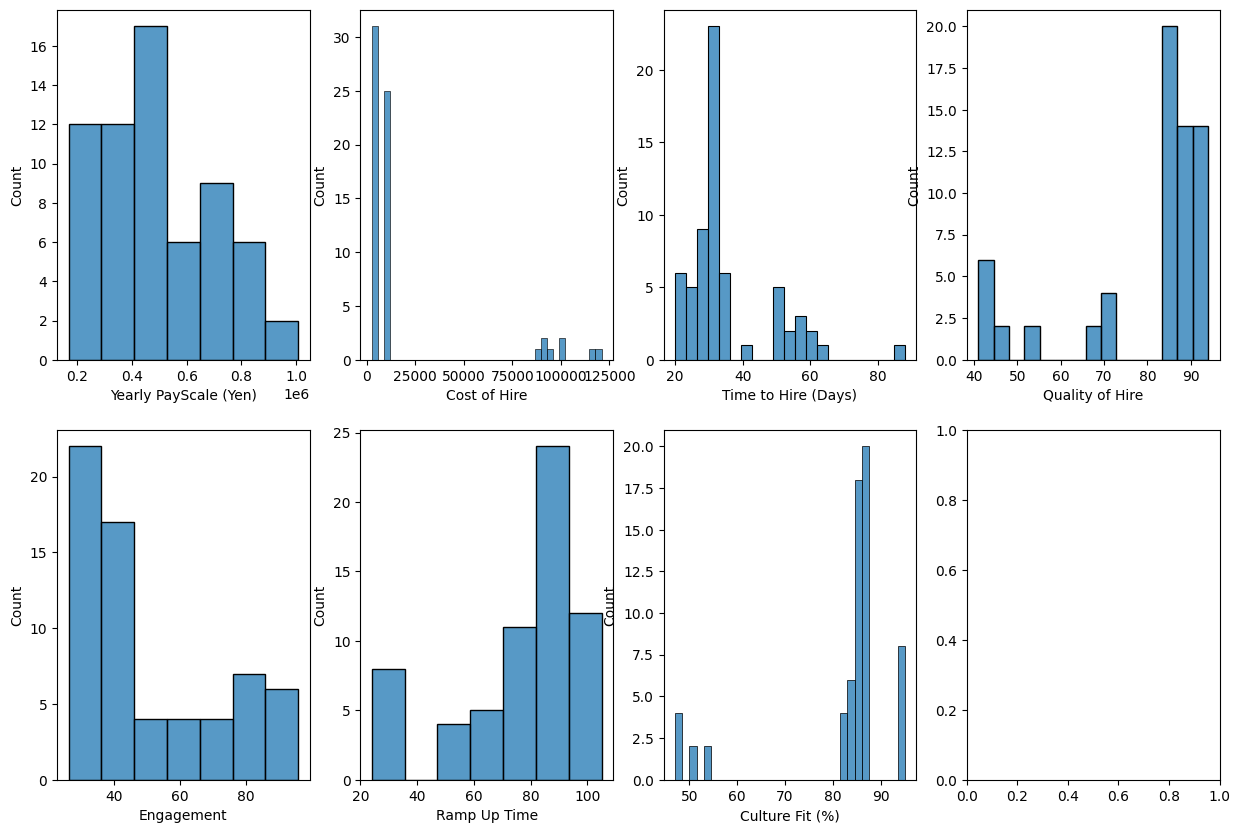

In [30]:
# Distribution des variables quantitatives
fig, ax = plt.subplots(2,4, figsize = (15,10))
for i, subplots in zip(df_quant_graphic.columns, ax.flatten()) :
    sns.histplot(df_quant_graphic[i], ax = subplots)
fig.show()


Lorsque nous étudions les variables quantitatives, plusieurs insights peuvent en être sortis. Les employés s'adaptent bien en termes culturels. La variable engagement à une distribution concentrée vers la gauche. La qualité de l'embauche est plutôt bonne mais nous avons aussi quelques salaires hauts. 

## Analyse Bivarié Quantitatives

In [31]:
y_vars = ['Time to Hire (Days)', 'Cost of Hire', 'Quality of Hire']
x_vars =[ 'Yearly PayScale (Yen)', 'Engagement', 'Ramp Up Time', 'Culture Fit (%)']

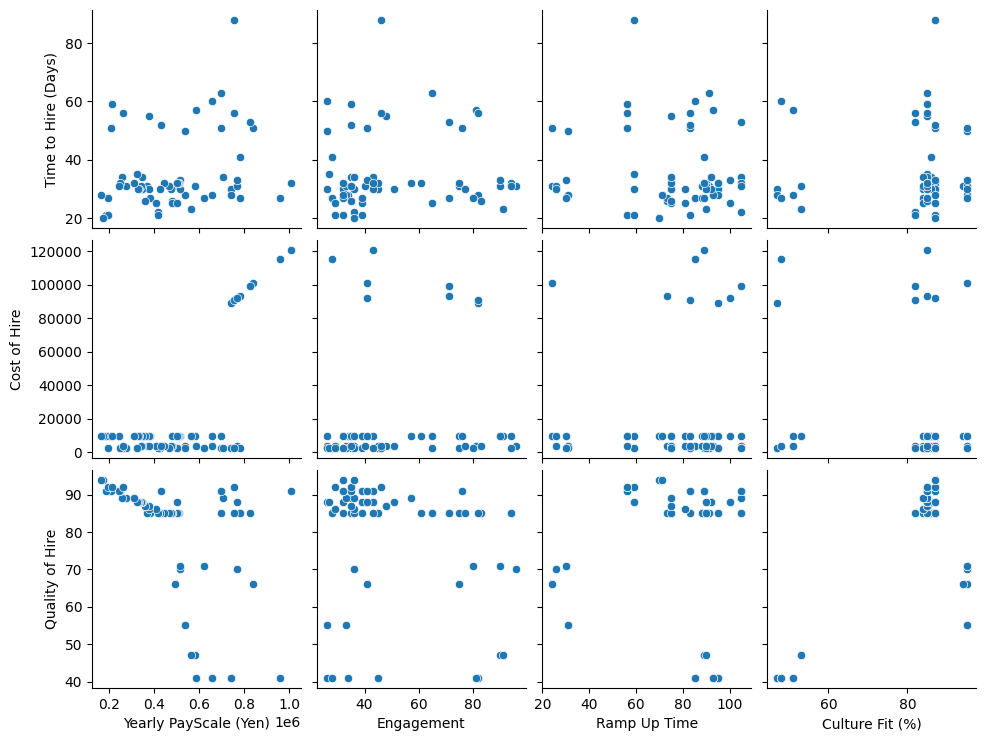

In [32]:
# Mise en relation entre les variables Quantitatives et les variables cible. 
sns.pairplot(df_quant, x_vars= x_vars, y_vars= y_vars)

Dans cette analyse bivarié on reaffirme ce que nous avons vu avant. Nous avons une densité plus forte vers dles haut des graphiques pour la qualite, vers le bas pour le coûts et un comportement plus héterogène pour le temps d'embauche. 

Sur Time to Hire , on voit que plus le temps d'embauche est court, plus l'engagement semble bas. Cela se reproduit aussi avec la variable de Salaire Annuel. Avec Cost of Hire on voit une sorte de rélation entre Salaire et Coût d'embauche au délà d'un seuil et cela peut en quelque sorte être l'élasticité. 

Lorsque la montée en puissance prend du temps , on a une rélation avec la qualité d'embauche. L'engagement a un comportement anormale. Cependant il faut noter que nous faisons que des rélations linéaires et elles peuvent vraisemblablement ne pas l'être. 

## Analyse Bivarié Qualitatives

In [33]:

targets = ['Cost of Hire','Time to Hire (Days)', 'Quality of Hire']

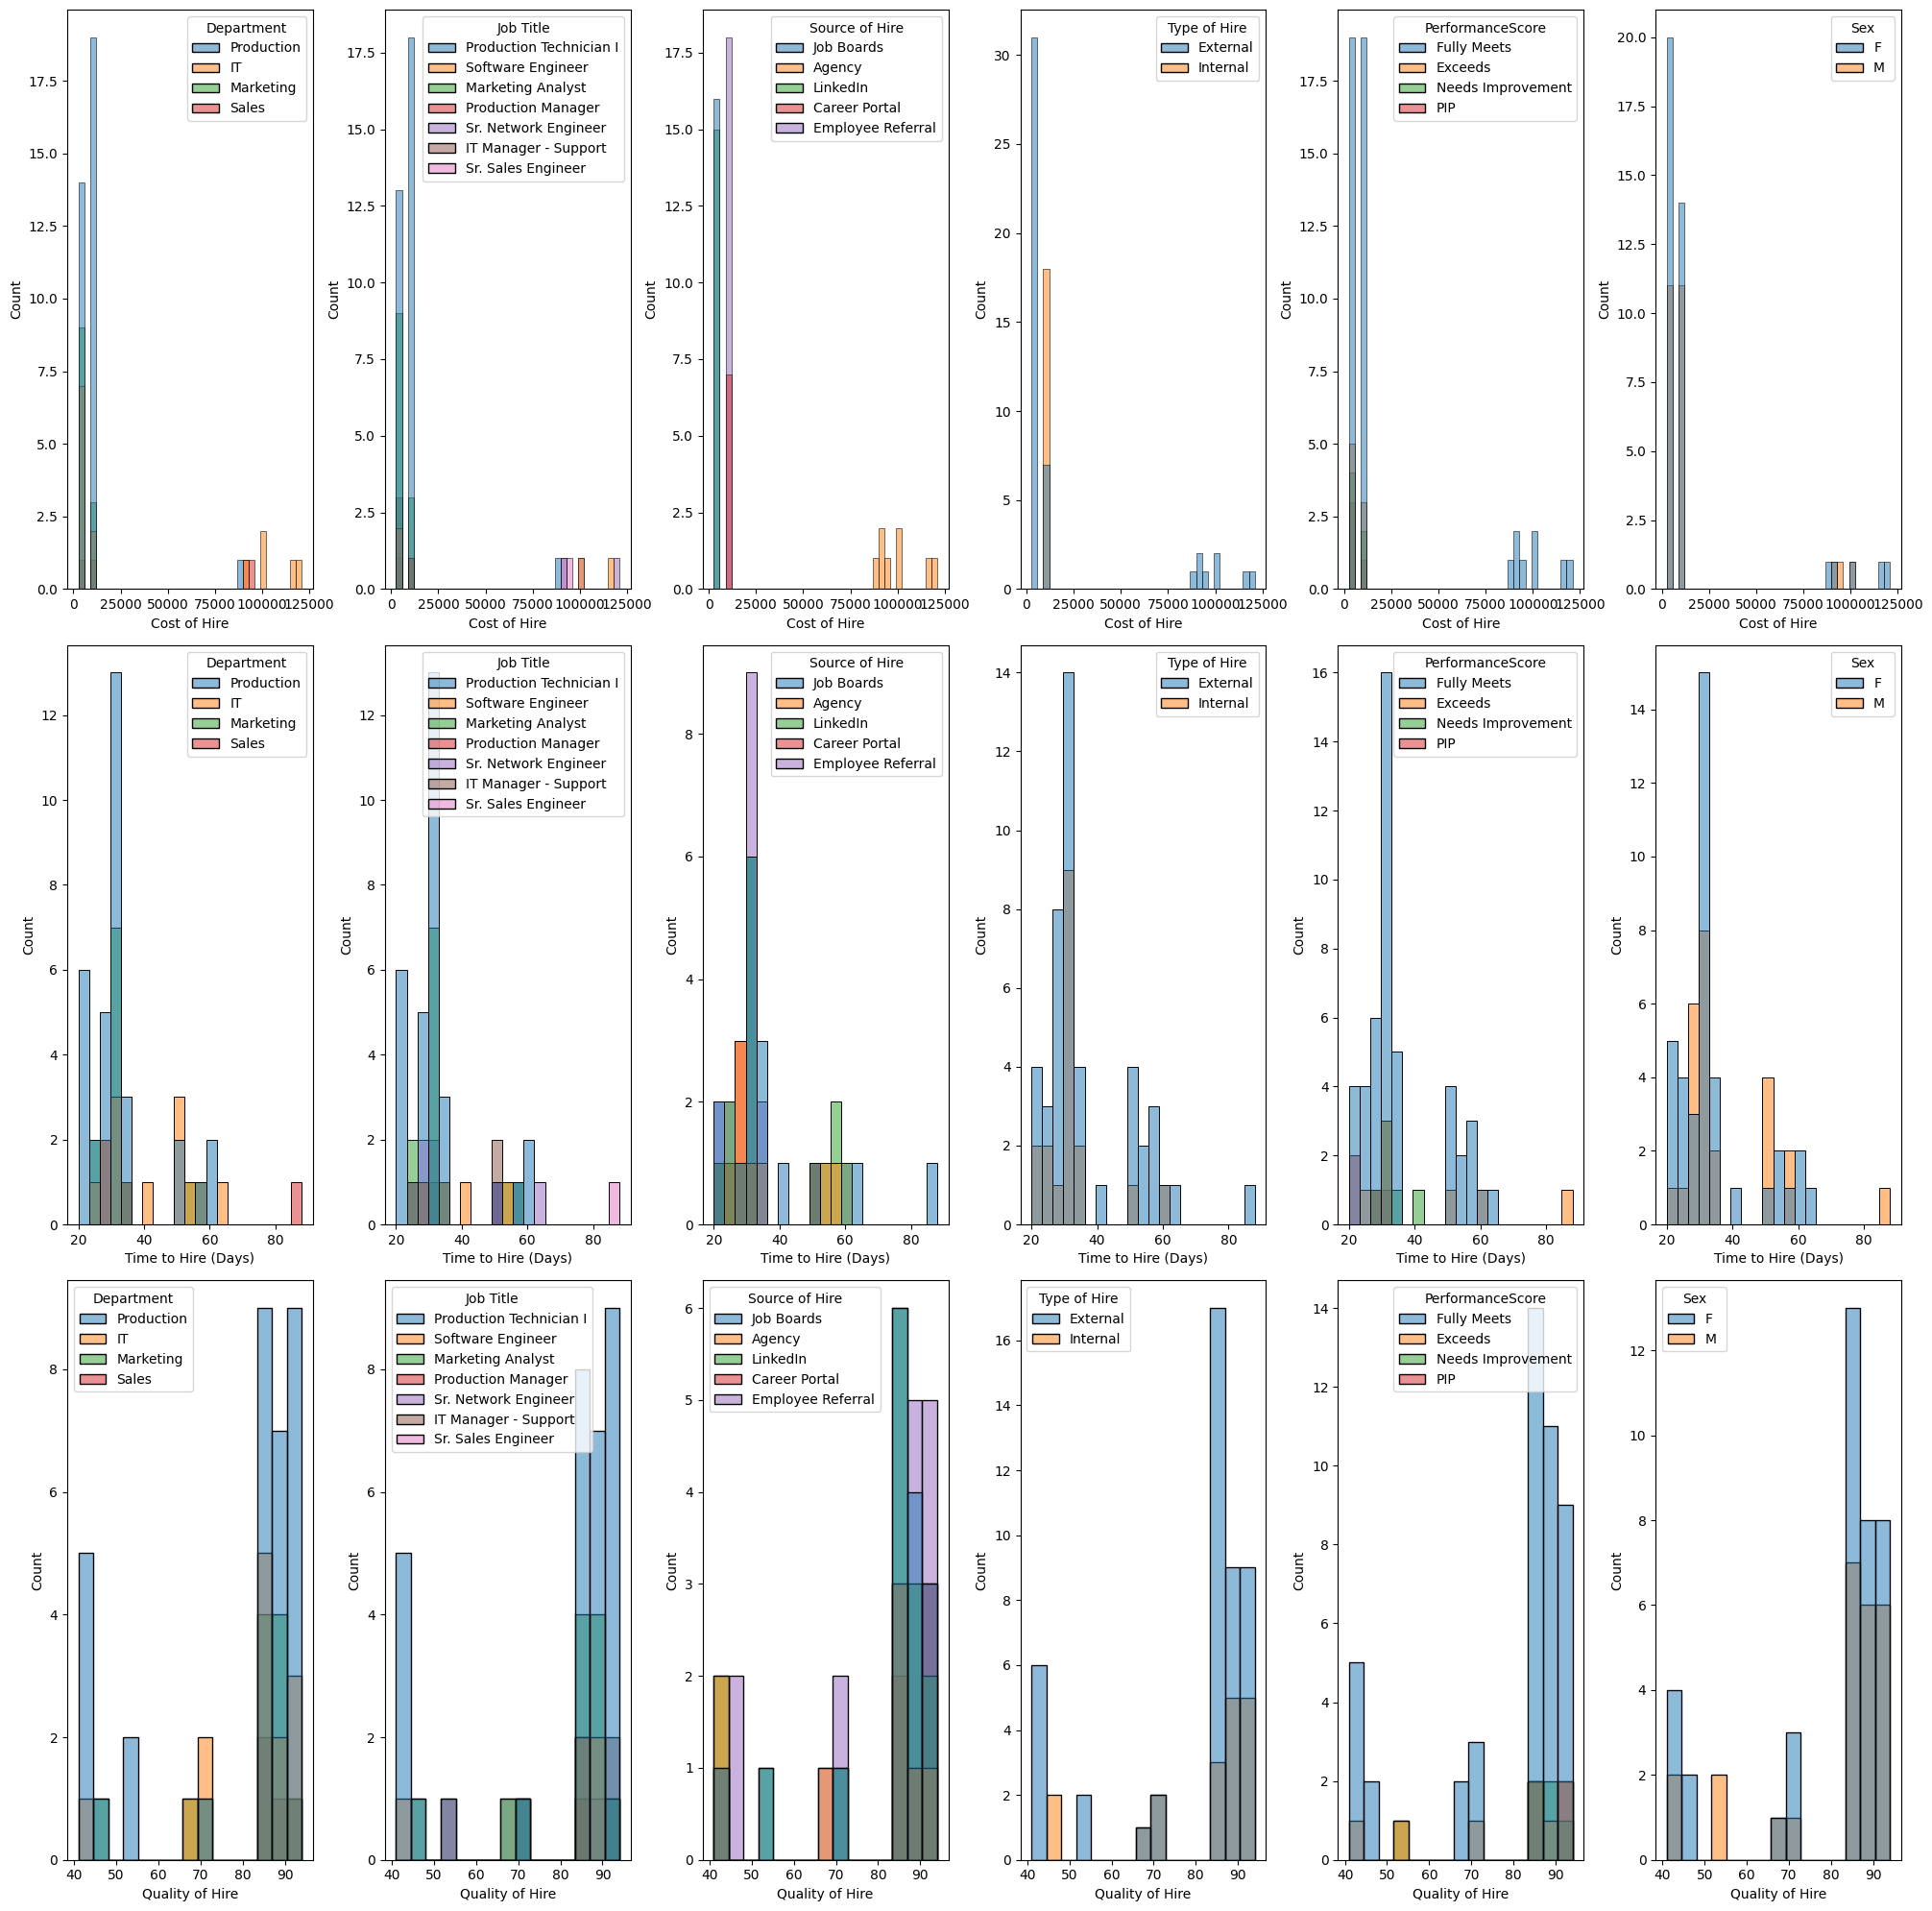

In [34]:
# Graphiques des variables quantitatives cibles avec des variables qualitatives en "hue"
fig, ax = plt.subplots(len(targets), len(df_quali.columns), figsize=(20, 20))

for i, subplots_a in zip(targets, ax):
    for j, sub_ax in zip(df_quali.columns, subplots_a.flatten()):
        sns.histplot(df, x=i, ax=sub_ax, hue=j)

plt.tight_layout()
plt.show()

Les coûts d'embuache ils sont plus fréquents vers le bas et les couleurs se superpossent. Nous pouvons nous apercevoire qu'ils sont plus hauts dans tout dce qui est Tech et tous les coûts hauts proviennent des Agency. En termes de PerformanceScore, les PiP sont vers les coûts de salaire bas. 

Le comportement en termes d'attente d'embauche est hétérogène en termes de departement ou nom de l'emploi. En externe et interne on voir que les internes prennent moins longtemps.

En termes de qualité, les qualités basses sont concentrées sur le domaine de la production mais il est aussi vrai que cela peut être un effet taille. Le reste de comportements pour cette variable sont hétérogènes. 

## Analyse Multivarié

df_quant = df_quant.drop(columns= 'Fiscal Year')

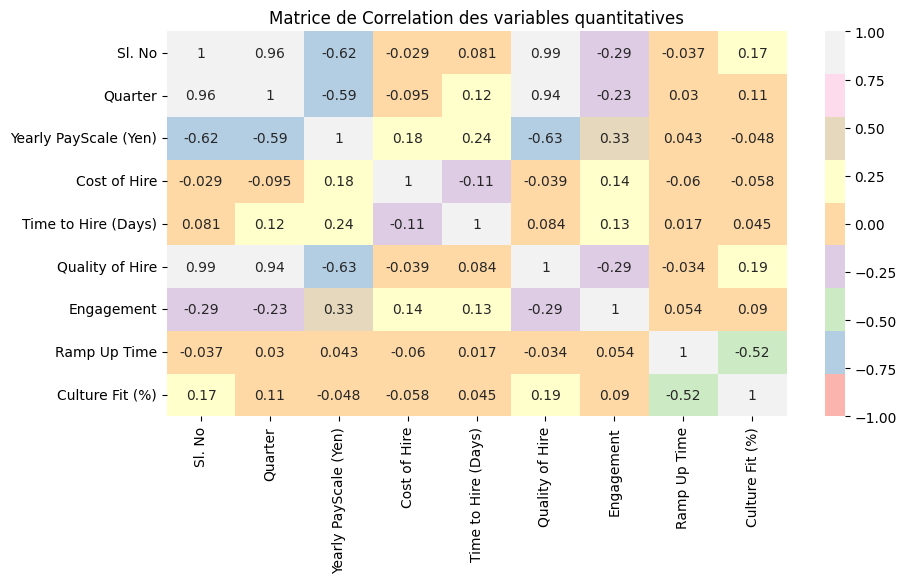

In [36]:
# Matrice de correlation. 
plt.figure(figsize = (10,5))
sns.heatmap(df_quant.corr(method= 'spearman'),vmin =-1, vmax= +1 , cmap= 'Pastel1', square = False, annot = True)
plt.title('Matrice de Correlation des variables quantitatives')
plt.show()

Les deux premières variables sont peu intéressantes en termes de signification car ce n'est qu'un ID et Trimestre. Nos variables cibles sont corrélées surtout  avec le salaire annuel et l'engagement. Cependant, à nouveau, ce ne sont que des rélations linéaires. 

La variable Time to Hire semble etre expliquée par le Salaiire et Engagement mais aussi l'adaptation culturelle. 

La variable de qualité d'embauche est surtout expliqué négativement par Salaire annuel et engagement et l'adaptation culturelle positivement. 

In [37]:
# Groups de Variables 
var_quant = df.select_dtypes(include= 'int').columns
var_date = ['Job Open Date', 'Hire Date']
var_quali = ['Department', 'Job Title', 'Source of Hire', 'Type of Hire', 'PerformanceScore', 'Sex']

In [38]:
# Correlation entre variables qualitatives.
for i in var_quali :
    for j in var_quali: 
        if i == j : 
            print(f" On traite les mêmes variables. Ici {i}")
        else : 
            crosstab_quali = pd.crosstab(df[i], df[j])
            corr_quali = scipy.stats.chi2_contingency(crosstab_quali)
            if corr_quali.pvalue <= 0.05:
                print(f'La correlation entre {i} et {j} on a une statistique de {corr_quali.statistic} avec p-value {round(corr_quali.pvalue,3)}')
            else: 
                print(f'Les variables {i} et {j} sont independantes')

 On traite les mêmes variables. Ici Department
La correlation entre Department et Job Title on a une statistique de 192.0 avec p-value 0.0
La correlation entre Department et Source of Hire on a une statistique de 31.336347872482328 avec p-value 0.002
Les variables Department et Type of Hire sont independantes
Les variables Department et PerformanceScore sont independantes
Les variables Department et Sex sont independantes
La correlation entre Job Title et Department on a une statistique de 192.0 avec p-value 0.0
 On traite les mêmes variables. Ici Job Title
La correlation entre Job Title et Source of Hire on a une statistique de 43.906507936507936 avec p-value 0.008
Les variables Job Title et Type of Hire sont independantes
Les variables Job Title et PerformanceScore sont independantes
Les variables Job Title et Sex sont independantes
La correlation entre Source of Hire et Department on a une statistique de 31.336347872482325 avec p-value 0.002
La correlation entre Source of Hire et Jo

En termes de variables categorielles  nous avons certaines relations qui sont significatives comme Source of Hire et Type of Hire. Nous avons aussi des relations très fortes comme Departement et Intitulé du Job. Cela semble logique. La plupart de relations sont de ce type.

**Preparation des données (recodages, normalisations, ect)**

Test de shapiro (Test d'adéquation à la Loi Normale)

In [40]:
# Test de normalité des variables. 
w_values = [] 
for i in var_quant: 
    norm_fit_base = stats.shapiro(df[i])
    w_values.append(norm_fit_base.statistic) 
    print(f'La variable {i} a un W de {norm_fit_base.statistic}') 
sum_w = sum(w_values)
print(f"\nSomme des W pour la transformation en Scaled : {sum_w:.4f}") 

La variable Sl. No a un W de 0.9551290406738953
La variable Fiscal Year a un W de 1.0
La variable Quarter a un W de 0.8615216813015105
La variable Yearly PayScale (Yen) a un W de 0.9627292441994025
La variable Cost of Hire a un W de 0.48804487770845073
La variable Time to Hire (Days) a un W de 0.7928891380922993
La variable Quality of Hire a un W de 0.702202607568952
La variable Engagement a un W de 0.8463817282820911
La variable Ramp Up Time a un W de 0.8665021429889564
La variable Culture Fit (%) a un W de 0.622471109828972

Somme des W pour la transformation en Scaled : 8.0979


Nous tenterons de normaliser nos variables par différentes methodes. 

Nous décidons de standariser car standariser conserve les distributions gaussiennes (normales), respecte les outliers et elle est robuste pour les analyses statistiques, notamment les test paramétriques comme l'ANOVA ou la régression linéaire. 

D'une autre côté, normaliser la donnée est utile pour les réseaux de neurones et les algorithmes basés sur des distances (KNN, SVM et clustering)

Nous avons decidé d'utiliser StandardScaler() car les variables ont des échelles différentes (ex : coût en monnaie et Culture Fit en %).

* Methode StandardScaler()

In [41]:
# Standardization --> La standardization semble plus pertinente que la normalisation dans le cadre d'une ANOVA. 
min_max_scaler = StandardScaler()
var_to_standardize = ["Cost of Hire", "Culture Fit (%)", "Quality of Hire", 
                       "Time to Hire (Days)", "Engagement", "Quarter", "Ramp Up Time"]
df_scaled = df.copy()

# Nous mettons la donnée en DataFrame

df_scaled = min_max_scaler.fit_transform(df_scaled[var_to_standardize])
df_scaled =  pd.DataFrame(df_scaled, columns = var_to_standardize)
df_scaled.head()

#Test de Shapiro

w_values = [] 
for i in var_to_standardize: 
    norm_fit_scaled = stats.shapiro(df_scaled[i])
    w_values.append(norm_fit_scaled.statistic) 
    print(f'La variable {i} a un W de {norm_fit_scaled.statistic}') 
sum_w = sum(w_values)
print(f"\nSomme des W pour la transformation en Scaled : {sum_w:.4f}")

La variable Cost of Hire a un W de 0.48804487770845106
La variable Culture Fit (%) a un W de 0.6224711098289717
La variable Quality of Hire a un W de 0.702202607568952
La variable Time to Hire (Days) a un W de 0.7928891380922993
La variable Engagement a un W de 0.8463817282820909
La variable Quarter a un W de 0.8615216813015101
La variable Ramp Up Time a un W de 0.8665021429889564

Somme des W pour la transformation en Scaled : 5.1800


In [42]:
df_remaining = df.drop(columns = var_to_standardize)
df_standardized = pd.concat([df_remaining, df_scaled], axis = 1)
df_standardized.head()

,Sl. No,Fiscal Year,Department,Job Open Date,Hire Date,Job Title,Source of Hire,Type of Hire,PerformanceScore,Sex,Yearly PayScale (Yen),Cost of Hire,Culture Fit (%),Quality of Hire,Time to Hire (Days),Engagement,Quarter,Ramp Up Time
0,1,2018,Production,04/01/2018,03/02/2018,Production Technician I,Job Boards,External,Fully Meets,F,744000,-0.489412,-2.761887,-2.38095,-0.410829,-0.242366,-1.612913,0.798634
1,2,2018,Production,05/01/2018,02/02/2018,Production Technician I,Agency,External,Fully Meets,F,744000,2.263141,-2.761887,-2.38095,-0.565495,1.470837,-1.612913,0.798634
2,3,2018,Production,04/02/2018,05/04/2018,Production Technician I,LinkedIn,External,Exceeds,F,660000,-0.445735,-2.683222,-2.38095,1.909148,-1.122119,-1.612913,0.359523
3,4,2018,IT,04/02/2018,03/03/2018,Software Engineer,Agency,External,Fully Meets,F,960000,3.086477,-2.683222,-2.38095,-0.642827,-1.029513,-1.612913,0.359523
4,5,2018,Production,04/02/2018,04/03/2018,Production Technician I,Career Portal,External,Fully Meets,M,660000,-0.255148,-2.447226,-2.38095,-0.565495,-0.751697,-1.612913,0.710812


On va à present Encoder les variables catégorielles

In [43]:
var_quali_encoded = ['Department', 'Job Title', 'Source of Hire', 'Type of Hire']

df_standardized = pd.get_dummies(df_standardized, columns =var_quali_encoded, drop_first=True)
print(df_standardized.columns)

df_standardized['PerformanceScore'] = df_standardized['PerformanceScore'].astype('object')

ordinal_cat = [['PIP','Needs Improvement','Fully Meets','Exceeds']]
encoder = OrdinalEncoder(categories= ordinal_cat)
df_standardized['PerformanceScore'] = encoder.fit_transform(df_standardized[['PerformanceScore']])

encoder = LabelEncoder()
df_standardized['Sex']= encoder.fit_transform(df_standardized['Sex'])



Index(['Sl. No', 'Fiscal Year', 'Job Open Date', 'Hire Date',
       'PerformanceScore', 'Sex', 'Yearly PayScale (Yen)', 'Cost of Hire',
       'Culture Fit (%)', 'Quality of Hire', 'Time to Hire (Days)',
       'Engagement', 'Quarter', 'Ramp Up Time', 'Department_Marketing',
       'Department_Production', 'Department_Sales',
       'Job Title_Marketing Analyst', 'Job Title_Production Manager',
       'Job Title_Production Technician I', 'Job Title_Software Engineer',
       'Job Title_Sr. Network Engineer', 'Job Title_Sr. Sales Engineer',
       'Source of Hire_Career Portal', 'Source of Hire_Employee Referral',
       'Source of Hire_Job Boards', 'Source of Hire_LinkedIn',
       'Type of Hire_Internal'],
      dtype='object')


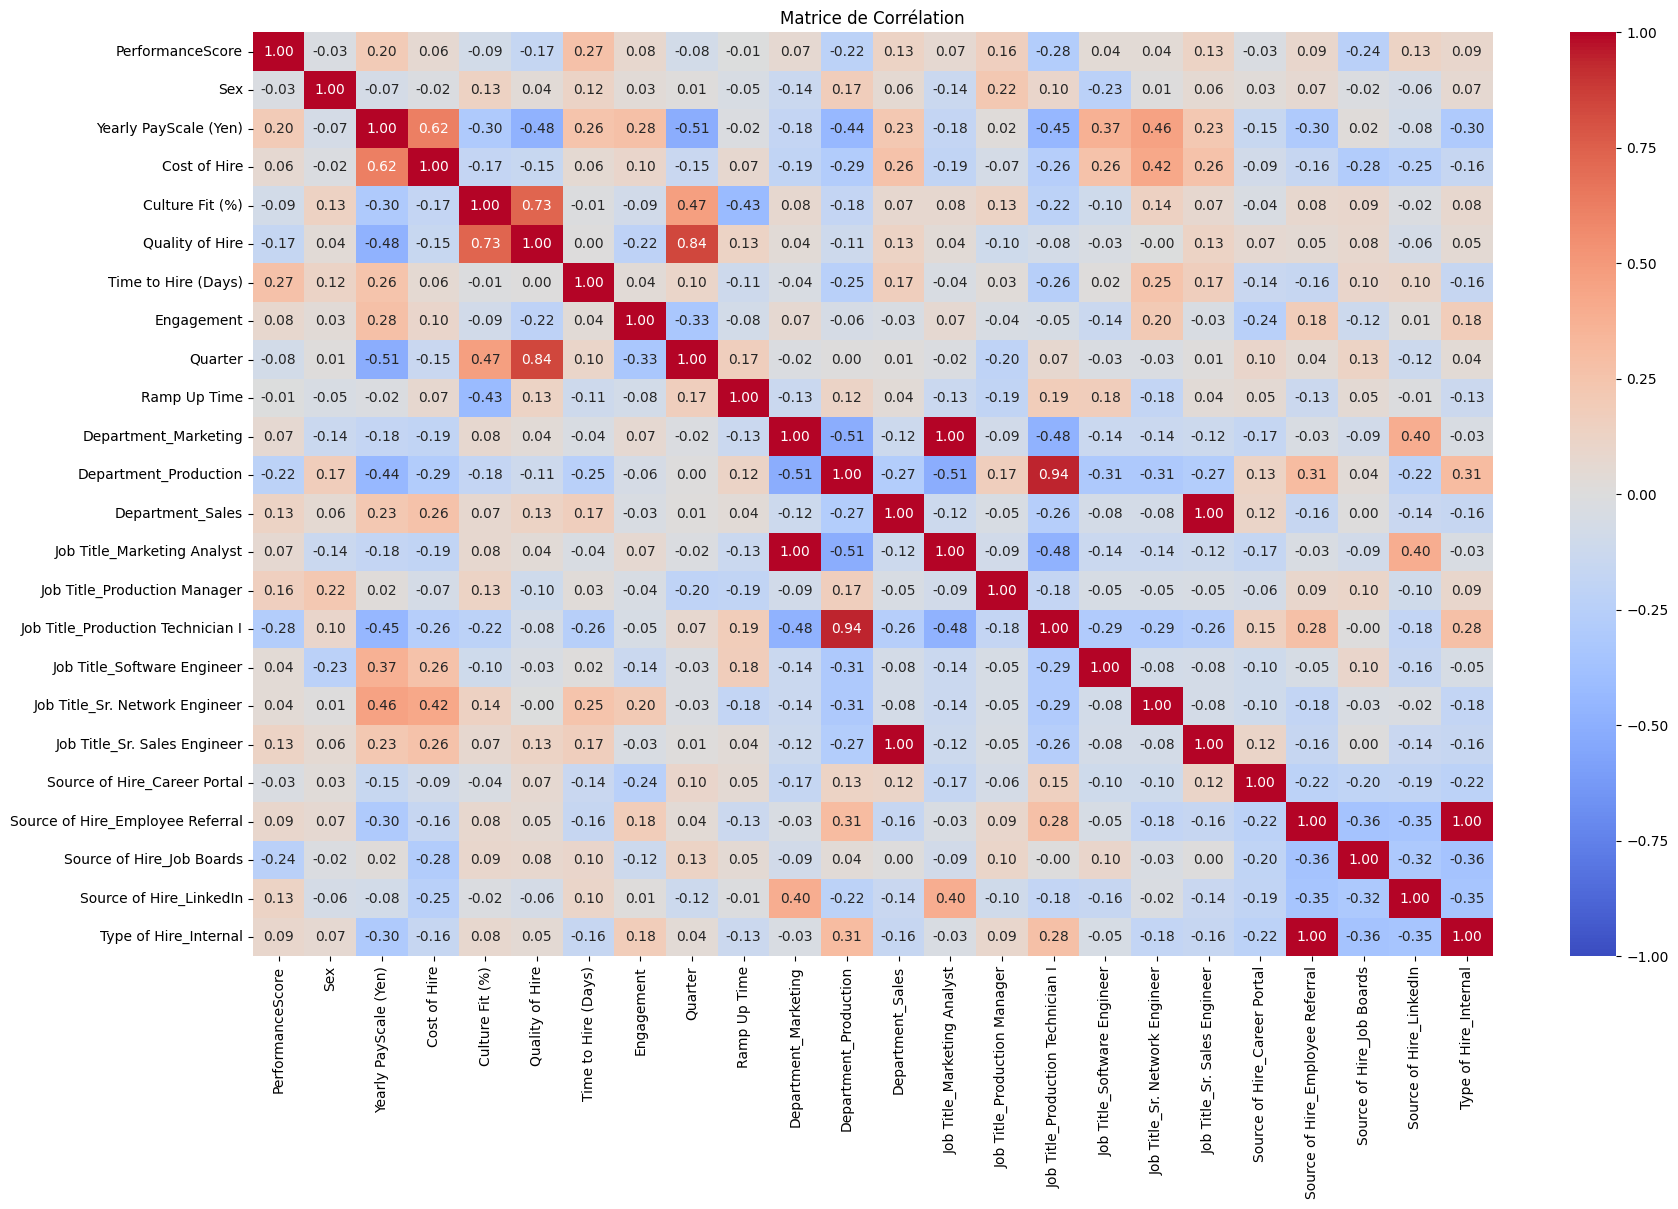

In [44]:
var_date = ['Job Open Date', 'Hire Date','Sl. No']

var_date.append('Fiscal Year')

df_standardized = df_standardized.drop(columns = var_date)
corr_matrix = df_standardized.corr()

df_standardized = df_standardized.applymap(lambda x : 1 if x is True else (0 if x is False else x))

# Pas de changement dans Matrice de Correlation si Avant ou Après.

plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix, annot = True , cmap = 'coolwarm', 
            fmt='.2f',vmin = -1,vmax =1)
plt.title("Matrice de Corrélation")
plt.show()
#Fiscal Year : les éléments d'une colonne ont la même valeur,
#  la corrélation ne peut pas être calculée

Pour analyser les corrélations dans le correlogramme :

1.Variables explicatives corrélées entre elles

- Yearly PayScale (Yen)" et "Cost of Hire" ont une forte corrélation positive (0.62).
- Quality of Hire est fortement corrélée avec Culture Fit (%) (0.73).
- Engagement et Quality of Hire sont aussi bien corrélés (0.84).
- Quarter" et Sl. No. sont quasi parfaitement corrélés (0.96), probablement parce que Sl. No. est un identifiant séquentiel.

2.Corrélations avec les variables cibles :
 
   - Cost of Hire :
     - Fortement corrélée avec "Yearly PayScale (Yen)" (0.62), ce qui est logique.
     - Modérément corrélée avec "Culture Fit (%)" (0.26).

   - Quality of Hire:
     - Très corrélée avec "Culture Fit (%)" (0.73) et "Engagement" (0.84), ce qui suggère que ces variables influencent fortement la qualité des recrutements.

   - Time to Hire (Days) :
     - Peu de corrélations marquées, mais on voit des liens modérés avec "Performance Score" (0.27) et "Quarter" (0.30).
     
On peut voir que des catégories sont corrélées presque a 1 commme job title production avec departmenent production ce qui est normale.

Pour que la variable ait un impact entre la variable cible et la variable explicative, il faut qu'il y ait une corrélation entre 0,3 à 0,7.



Nous pouvons voir que la variable Job Title et Department ont de forte corrélation entre certaines catégories comme Department_Sales et Job_Ttile8Sr. Sale Engineer, Department_Production et Job_Title_Production Technician

In [45]:
# Mettre le code  du VIF 

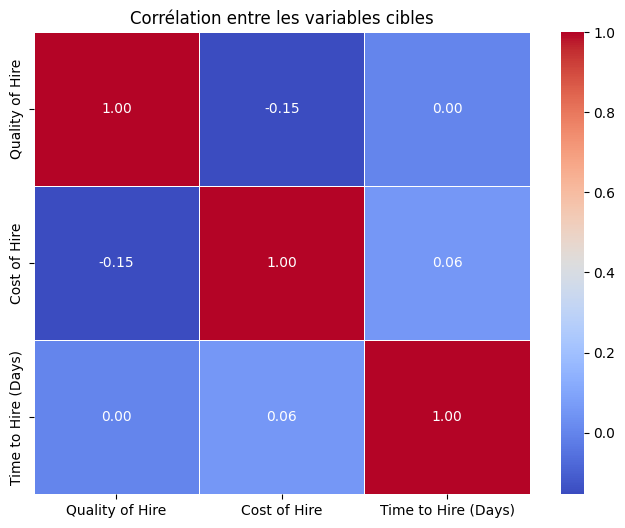

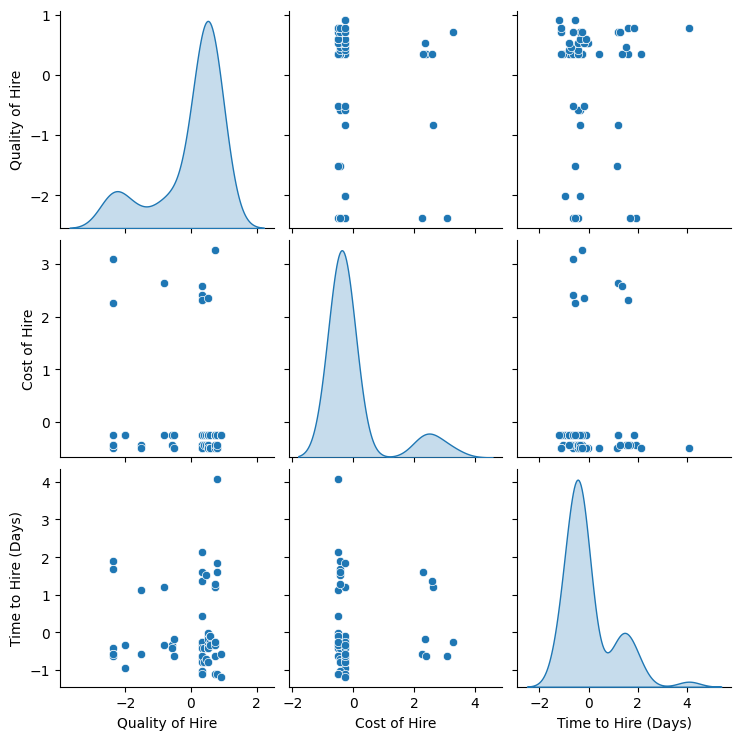

In [46]:
target_vars = ["Quality of Hire", "Cost of Hire", "Time to Hire (Days)"]

# Calcul de la matrice de corrélation
corr_matrix = df_standardized[target_vars].corr()

# Affichage de la heatmap des corrélations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Corrélation entre les variables cibles")
plt.show()

# Affichage des scatter plots pour voir les relations
sns.pairplot(df_standardized[target_vars], diag_kind="kde")
plt.show()

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Variable"] = df_standardized.columns
vif_data["VIF"] = [variance_inflation_factor(df_standardized.values, i) for i in range(df_standardized.shape[1])]

In [48]:
df_standardized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PerformanceScore                   64 non-null     float64
 1   Sex                                64 non-null     int64  
 2   Yearly PayScale (Yen)              64 non-null     int64  
 3   Cost of Hire                       64 non-null     float64
 4   Culture Fit (%)                    64 non-null     float64
 5   Quality of Hire                    64 non-null     float64
 6   Time to Hire (Days)                64 non-null     float64
 7   Engagement                         64 non-null     float64
 8   Quarter                            64 non-null     float64
 9   Ramp Up Time                       64 non-null     float64
 10  Department_Marketing               64 non-null     int64  
 11  Department_Production              64 non-null     int64  
 

Test ANOVA

In [32]:
var_quali_renamed =  ['Department', 'Job_Title', 'Source_of_Hire', 'Type_of_Hire', 'PerformanceScore', 'Sex']
df = df.rename(columns={"Time to Hire (Days)": "Time_to_Hire_Days"})
df = df.rename(columns={"Job Title": "Job_Title"})
df = df.rename(columns={"Source of Hire": "Source_of_Hire"})
df = df.rename(columns={"Type of Hire": "Type_of_Hire"})
df = df.rename(columns={"Cost of Hire": "Cost_of_Hire"})
df = df.rename(columns={"Quality of Hire": "Quality_of_Hire"})


target_days = 'Time_to_Hire_Days'

**Test ANOVA pour la variable Time to Hire Days**

In [33]:
print("ANOVA à 1 facteur :")
for var in var_quali_renamed:
    print(f"\nEffet de {var} sur {target_days} :")
    formula = f"{target_days} ~ C({var})"
    model = smf.ols(formula=formula, data=df).fit()
    anova_results = anova_lm(model)
    print(anova_results)

ANOVA à 1 facteur :

Effet de Department sur Time_to_Hire_Days :
                 df       sum_sq     mean_sq         F    PR(>F)
C(Department)   3.0  1052.892157  350.964052  2.182418  0.099404
Residual       60.0  9648.857843  160.814297       NaN       NaN

Effet de Job_Title sur Time_to_Hire_Days :
                df       sum_sq     mean_sq         F    PR(>F)
C(Job_Title)   6.0  1393.883333  232.313889  1.422656  0.221947
Residual      57.0  9307.866667  163.295906       NaN       NaN

Effet de Source_of_Hire sur Time_to_Hire_Days :
                     df        sum_sq     mean_sq         F    PR(>F)
C(Source_of_Hire)   4.0    627.997222  156.999306  0.919514  0.458739
Residual           59.0  10073.752778  170.741573       NaN       NaN

Effet de Type_of_Hire sur Time_to_Hire_Days :
                   df        sum_sq     mean_sq         F   PR(>F)
C(Type_of_Hire)   1.0    265.653382  265.653382  1.578225  0.21373
Residual         62.0  10436.096618  168.324139       NaN      N

In [34]:
print("\n\nANOVA à 2 facteurs (avec interactions) :")
for var1, var2 in itertools.combinations(var_quali_renamed, 2):
    print(f"\nEffet de {var1}, {var2} et leur interaction sur {target_days} :")
    formula = f"{target_days} ~ C({var1}) + C({var2}) + C({var1}):C({var2})"
    model = smf.ols(formula=formula, data=df).fit()
    anova_results = anova_lm(model)
    print(anova_results)



ANOVA à 2 facteurs (avec interactions) :

Effet de Department, Job_Title et leur interaction sur Time_to_Hire_Days :
                              df       sum_sq     mean_sq         F    PR(>F)
C(Department)                3.0  1052.892157  350.964052  2.149252  0.104028
C(Job_Title)                 6.0   412.415265   68.735878  0.420928  0.862076
C(Department):C(Job_Title)  18.0  2019.325620  112.184757  0.687003  0.809286
Residual                    57.0  9307.866667  163.295906       NaN       NaN

Effet de Department, Source_of_Hire et leur interaction sur Time_to_Hire_Days :
                                   df       sum_sq     mean_sq         F  \
C(Department)                     3.0  1052.892157  350.964052  2.777477   
C(Source_of_Hire)                 4.0   495.113106  123.778277  0.979563   
C(Department):C(Source_of_Hire)  12.0  3364.792386  280.399366  2.219039   
Residual                         48.0  6065.315079  126.360731       NaN   

                             

**Time_to_Hire_Days FAIRE EXPLICATION POUR INTERACTION** 

(Department):C(Source_of_Hire) : 

C(Department):C(PerformanceScore) :

C(Job_Title):C(Source_of_Hire) :

C(Job_Title):C(PerformanceScore) :

**CONCLUSION Time_to_Hire_Days**

variable catégorielle : Department, Souce_of_Hire, PerformanceScore, Job_Title

**Test ANOVA pour la variable **Cost of Hire**

In [35]:
var_quali_renamed =  ['Department', 'Job_Title', 'Source_of_Hire', 'Type_of_Hire', 'PerformanceScore', 'Sex']
target_cost = 'Cost_of_Hire'
print("ANOVA à 1 facteur :")
for var in var_quali_renamed:
    print(f"\nEffet de {var} sur {target_cost} :")
    formula = f"{target_cost} ~ C({var})"
    model = smf.ols(formula=formula, data=df).fit()
    anova_results = anova_lm(model)
    print(anova_results)

ANOVA à 1 facteur :

Effet de Department sur Cost_of_Hire :
                 df        sum_sq       mean_sq         F    PR(>F)
C(Department)   3.0  1.559798e+10  5.199327e+09  6.521959  0.000683
Residual       60.0  4.783220e+10  7.972033e+08       NaN       NaN

Effet de Job_Title sur Cost_of_Hire :
                df        sum_sq       mean_sq         F    PR(>F)
C(Job_Title)   6.0  2.348431e+10  3.914051e+09  5.585081  0.000131
Residual      57.0  3.994587e+10  7.008047e+08       NaN       NaN

Effet de Source_of_Hire sur Cost_of_Hire :
                     df        sum_sq       mean_sq           F        PR(>F)
C(Source_of_Hire)   4.0  6.245584e+10  1.561396e+10  945.491815  9.482778e-53
Residual           59.0  9.743328e+08  1.651412e+07         NaN           NaN

Effet de Type_of_Hire sur Cost_of_Hire :
                   df        sum_sq       mean_sq         F    PR(>F)
C(Type_of_Hire)   1.0  1.615832e+09  1.615832e+09  1.620685  0.207749
Residual         62.0  6.181434e+10 

In [36]:
print("\n\nANOVA à 2 facteurs (avec interactions) :")
for var1, var2 in itertools.combinations(var_quali_renamed, 2):
    print(f"\nEffet de {var1}, {var2} et leur interaction sur {target_cost} :")
    formula = f"{target_cost} ~ C({var1}) + C({var2}) + C({var1}):C({var2})"
    model = smf.ols(formula=formula, data=df).fit()
    anova_results = anova_lm(model)
    print(anova_results)



ANOVA à 2 facteurs (avec interactions) :

Effet de Department, Job_Title et leur interaction sur Cost_of_Hire :
                              df        sum_sq       mean_sq         F  \
C(Department)                3.0  1.559798e+10  5.199327e+09  7.419081   
C(Job_Title)                 6.0  1.702723e+10  2.837871e+09  4.049446   
C(Department):C(Job_Title)  18.0  1.127022e+10  6.261232e+08  0.893435   
Residual                    57.0  3.994587e+10  7.008047e+08       NaN   

                              PR(>F)  
C(Department)               0.000280  
C(Job_Title)                0.001897  
C(Department):C(Job_Title)  0.588220  
Residual                         NaN  

Effet de Department, Source_of_Hire et leur interaction sur Cost_of_Hire :
                                   df        sum_sq       mean_sq           F  \
C(Department)                     3.0  1.559798e+10  5.199327e+09  407.567863   
C(Source_of_Hire)                 4.0  4.696725e+10  1.174181e+10  920.424018   
C

ici, on peut voir que C(Department):C(Source_of_Hire), C(Job_Title):C(Source_of_Hire), C(Source_of_Hire):C(Type_of_Hire), C(Source_of_Hire):C(PerformanceScore), C(Source_of_Hire):C(PerformanceScore) , C(Source_of_Hire):C(Sex) sont significatifs.

**C(Department) : C(Source_of_Hire)**
   → L'impact du département sur le coût d'embauche dépend de la source de recrutement. Certains départements peuvent avoir des coûts de recrutement plus élevés selon qu'ils recrutent via LinkedIn, des recommandations internes, etc.  

**C(Job_Title) : C(Source_of_Hire)**
   → Le coût d'embauche varie selon le poste et la source de recrutement. Certains postes sont plus coûteux à recruter via certaines sources.  

**C(Source_of_Hire) : C(Type_of_Hire)**
   → Le type de recrutement (interne, externe) influe sur le coût, mais cet effet varie en fonction de la source de recrutement. Un recrutement interne via LinkedIn pourrait être plus ou moins coûteux qu’un recrutement externe via un job board.  

**C(Source_of_Hire) : C(PerformanceScore)**
   → Le coût d’embauche pourrait être lié aux performances futures des employés recrutés via différentes sources. Certaines sources de recrutement mènent peut-être à de meilleures performances (et donc un meilleur retour sur investissement en termes de coût d’embauche).  

**C(Source_of_Hire) : C(Sex)**
   → La source de recrutement pourrait être corrélée à une différence de coût selon le genre des employés recrutés. Cela peut être dû à des différences dans les types de postes occupés ou les négociations salariales selon la source.  

**Conclusion pour Cost_of_Hire** : 

variable catégorielle : Source_of_Hire 

variable quantitative : Yearly PayScale (Yen) (0.62)

* Test **ANOVA** pour la variable **Quality of Hire**

In [37]:
var_quali_renamed =  ['Department', 'Job_Title', 'Source_of_Hire', 'Type_of_Hire', 'PerformanceScore', 'Sex']
target_quality = 'Quality_of_Hire'
print("ANOVA à 1 facteur :")
for var in var_quali_renamed:
    print(f"\nEffet de {var} sur {target_quality} :")
    formula = f"{target_quality} ~ C({var})"
    model = smf.ols(formula=formula, data=df).fit()
    anova_results = anova_lm(model)
    print(anova_results)

ANOVA à 1 facteur :

Effet de Department sur Quality_of_Hire :
                 df        sum_sq     mean_sq         F    PR(>F)
C(Department)   3.0    385.108543  128.369514  0.472681  0.702462
Residual       60.0  16294.641457  271.577358       NaN       NaN

Effet de Job_Title sur Quality_of_Hire :
                df        sum_sq     mean_sq         F    PR(>F)
C(Job_Title)   6.0    623.214583  103.869097  0.368731  0.895784
Residual      57.0  16056.535417  281.693604       NaN       NaN

Effet de Source_of_Hire sur Quality_of_Hire :
                     df        sum_sq     mean_sq         F    PR(>F)
C(Source_of_Hire)   4.0    587.887103  146.971776  0.538865  0.707735
Residual           59.0  16091.862897  272.743439       NaN       NaN

Effet de Type_of_Hire sur Quality_of_Hire :
                   df        sum_sq     mean_sq         F    PR(>F)
C(Type_of_Hire)   1.0     41.334541   41.334541  0.154026  0.696064
Residual         62.0  16638.415459  268.361540       NaN       

In [38]:
print("\n\nANOVA à 2 facteurs (avec interactions) :")
for var1, var2 in itertools.combinations(var_quali_renamed, 2):
    print(f"\nEffet de {var1}, {var2} et leur interaction sur {target_quality} :")
    formula = f"{target_quality} ~ C({var1}) + C({var2}) + C({var1}):C({var2})"
    model = smf.ols(formula=formula, data=df).fit()
    anova_results = anova_lm(model)
    print(anova_results)



ANOVA à 2 facteurs (avec interactions) :

Effet de Department, Job_Title et leur interaction sur Quality_of_Hire :
                              df        sum_sq     mean_sq         F    PR(>F)
C(Department)                3.0    385.108543  128.369514  0.455706  0.714296
C(Job_Title)                 6.0   4128.125906  688.020984  2.442444  0.035939
C(Department):C(Job_Title)  18.0   6962.688577  386.816032  1.373180  0.181042
Residual                    57.0  16056.535417  281.693604       NaN       NaN

Effet de Department, Source_of_Hire et leur interaction sur Quality_of_Hire :
                                   df        sum_sq     mean_sq         F  \
C(Department)                     3.0    385.108543  128.369514  0.558600   
C(Source_of_Hire)                 4.0   1248.650956  312.162739  1.358375   
C(Department):C(Source_of_Hire)  12.0   6160.344276  513.362023  2.233893   
Residual                         48.0  11030.685714  229.805952       NaN   

                       

C(Department):C(Job_Title), C(Department):C(Type_of_Hire), C(Department):C(Source_of_Hire), C(Source_of_Hire):C(Type_of_Hire), C(Job_Title):C(Type_of_Hire), C(Job_Title):C(Source_of_Hire)

C(Department):C(Job_Title) : l'effet du titre du poste sur la qualité de l'embauche varie selon le departement. 
On peut avoir certains departement qui peuvent recruter des profils spécifiques qui influencent la qualité de l'embauche.

Ex : un Software Engineer peut être plus performant dans un département R&D qu'en Production.

C(Department):C(Type_of_Hire) : l'impact du type d’embauche (interne, externe) sur la qualité de l’embauche dépend du département.

ex : recrutement interne pour certains services peut etre plus bénéfique car la personne interne recruté aura plus de connaissances alors que dans certains departement, on aura tendance à privileger les personne externe qui seront apporter du nouveau aux services. 

C(Department):C(Source_of_Hire) : l'effacité de la source de recrutement varie en fonction du departement. 

Pour certains departement comme la Tech, les recrutements via Linkedin seront de meilleurs qualités alors que les recrutements via d'autres plateformes sont meilleurs pour la Production.

C(Source_of_Hire):C(Type_of_Hire) : l'interaction indique que la qualité de l'embauche dépend à la fois de la source de recrutement et du type d'mbauche.

Ex : recrutement interne via des recommandations peut etre meilleures que des plateformes. 

C(Job_Title):C(Type_of_Hire) : le type d'embauche influence la qualité de l'embauche, mais cet effet dépend aussi du titre du poste. 

Ex : Un Senior Sales Engineer embauché en interne peut être plus performant qu’un Junior Sales Engineer recruté à l’externe.


**CONCLUSION pour Quality_of_Hire**

variable catégorielles : Department, Job Title, Type of Hire, Source of Hire

variable quantitatives : Culture Fit (0.73), Yearly PayScale (-0.48), Quarter (O.84)

In [39]:
df_standardized = df_standardized.rename(columns=lambda x: x.strip().replace(" ","_").replace("(","").replace(")","")) #strip() enleve les espaces

In [40]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Supposons que df_standardized soit déjà créé et que les 3 variables cibles sont 'Cost of Hire', 'Time to Hire' et 'Quality of Hire'

# Sélection des variables explicatives et cibles

df_standardized = df_standardized.rename(columns=lambda x: x.strip().replace(" ","_").replace("()","").replace(")","").replace("%","").replace(".",""))
X = df_standardized.drop(['Cost_of_Hire', 'Time_to_Hire_Days', 'Quality_of_Hire'], axis=1)  # Variables explicatives
y = df_standardized[['Cost_of_Hire', 'Time_to_Hire_Days', 'Quality_of_Hire']]  # Variables cibles

import statsmodels.api as sm

# Ajouter une constante pour l'interception
X = sm.add_constant(X)

# Modèle de régression linéaire multiple pour chaque variable cible
models = {}
p_values = {}
r_squared = {}

for target in y.columns:
    # Appliquer la régression linéaire multiple avec la formule
    formula = f"{target} ~ " + " + ".join(X.columns.difference(['const']))
    model = sm.OLS.from_formula(formula, data=X.join(y)).fit()
    models[target] = model
    p_values[target] = model.pvalues
    r_squared[target] = model.rsquared

    # Afficher les p-values et le r^2
    print(f"\nP-values pour la régression de {target} :")
    print(model.summary())  # Affiche le tableau des résultats avec p-values




P-values pour la régression de Cost_of_Hire :
                            OLS Regression Results                            
Dep. Variable:           Cost_of_Hire   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     245.6
Date:                Wed, 19 Feb 2025   Prob (F-statistic):           2.71e-39
Time:                        22:48:57   Log-Likelihood:                 53.799
No. Observations:                  64   AIC:                            -71.60
Df Residuals:                      46   BIC:                            -32.74
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

**Pour Time_to_Hire_Days les variables significatifs sont** : 
- Job Title_Production_Technician_I (p-value=0.015)
- Ramp_Up_Time (p-value=0.000)
- Quarter (p-value=0.000)
- Culture_Fit (p-value=0.000)
- PerformanceScore (p-value=0.053)


**Significativé des variables par test pour Time_to_Hire_Days :**
variable catégorielle : Department, Souce_of_Hire, PerformanceScore, Job_Title

In [43]:
import statsmodels.api as sm

# Sélectionner les variables significatives pour la régression
X = df_standardized[['Job_Title_Production_Technician_I', 'Ramp_Up_Time', 'Quarter', 'Culture_Fit_', 'PerformanceScore']]
y = df_standardized['Time_to_Hire_Days']

# Ajouter une constante pour l'interception
X = sm.add_constant(X)

# Créer et ajuster le modèle de régression linéaire
model = sm.OLS(y, X).fit()

# Afficher les résultats du modèle
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Time_to_Hire_Days   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     2.574
Date:                Wed, 19 Feb 2025   Prob (F-statistic):             0.0359
Time:                        22:50:44   Log-Likelihood:                -84.398
No. Observations:                  64   AIC:                             180.8
Df Residuals:                      58   BIC:                             193.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

**Pour Time_to_Hire_Days les variables significatifs sont** : 
- Yearly_PayScale_Yen (p-value=0.015)
- Culture_Fit (p-value=0.058)
- Quarter (p-value=0.001)
- Source_of_Hire_Employee_Referral  (p-value=0.048)    
- Source_of_Hire_Job_Boards (p-value=0.018)   
- Source_of_Hire_LinkedIn (p-value=0.010)
- Type_of_Hire_Internal (p-value=0.048)

**Significativé des variables par test pour Time_to_Hire_Days :**



**Pour Cost_of_Hire les variables significatifs sont** : 

- Source_of_Hire_Career_Portal (p-value = 0.000)
- Source_of_Hire_Employee_Referral (p-value = 0.000)
- Source_of_Hire_Job_Boards (p-value = 0.000)
- Source_of_Hire_LinkedIn (p-value = 0.000)
- Type_of_Hire_Internal (p-value = 0.000)
- Yearly_PayScale_Yen   (p-value=0.034)    

In [44]:

##### COST_OF_HIRE ########
import statsmodels.api as sm

# Sélectionner les variables significatives pour la régression
X = df_standardized[['Source_of_Hire_Career_Portal', 'Source_of_Hire_Employee_Referral', 'Source_of_Hire_Job_Boards', 'Source_of_Hire_LinkedIn', 'Type_of_Hire_Internal', 'Yearly_PayScale_Yen']]
y = df_standardized['Cost_of_Hire']

# Ajouter une constante pour l'interception
X = sm.add_constant(X)

# Créer et ajuster le modèle de régression linéaire
model = sm.OLS(y, X).fit()

# Afficher les résultats du modèle
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Cost_of_Hire   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     778.8
Date:                Wed, 19 Feb 2025   Prob (F-statistic):           8.30e-52
Time:                        22:51:01   Log-Likelihood:                 44.279
No. Observations:                  64   AIC:                            -76.56
Df Residuals:                      58   BIC:                            -63.60
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [45]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Supposons que df_standardized soit déjà créé et que les 3 variables cibles sont 'Cost of Hire', 'Time to Hire' et 'Quality of Hire'

# Renommer les variables 
df_standardized = df_standardized.rename(columns=lambda x: x.strip().replace(" ","_").replace("()","").replace(")","").replace("%","").replace(".",""))

# Sélection des variables explicatives et cibles
X = df_standardized.drop(['Cost_of_Hire', 'Time_to_Hire_Days', 'Quality_of_Hire'], axis=1)  # Variables explicatives
y = df_standardized[['Cost_of_Hire', 'Time_to_Hire_Days', 'Quality_of_Hire']]  # Variables cibles

# Ajout d'une constante pour l'interception (intercept)
X = sm.add_constant(X)

# Régression linéaire multiple pour chaque variable cible
models = {}
p_values = {}
r_squared = {}

for target in y.columns:
    # Appliquer la régression linéaire multiple avec la formule
    formula = f"{target} ~ " + " + ".join(X.columns.difference(['const']))
    model = sm.OLS.from_formula(formula, data=X.join(y)).fit()
    models[target] = model
    p_values[target] = model.pvalues
    r_squared[target] = model.rsquared

    # Afficher les p-values et le r^2
    print(f"\nP-values pour la régression de {target} :")
    print(model.summary())  # Affiche le tableau des résultats avec p-values
    print(f"Le R^2 pour la variable {target} est {model.rsquared}")



P-values pour la régression de Cost_of_Hire :
                            OLS Regression Results                            
Dep. Variable:           Cost_of_Hire   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     245.6
Date:                Wed, 19 Feb 2025   Prob (F-statistic):           2.71e-39
Time:                        22:51:03   Log-Likelihood:                 53.799
No. Observations:                  64   AIC:                            -71.60
Df Residuals:                      46   BIC:                            -32.74
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

Pour le modèle de "Cost of Hire", les variables liées à Department_* et Job Title_* (à l'exception de Job Title_Software Engineer) ont des p-values élevées. on peux envisager de supprimer ces variables.

Pour le modèle de "Time to Hire", les variables Department_* et Job Title_* ont des p-values élevées à l'exception de Job Title_Sr. Network Engineer.

Pour le modèle de "Quality of Hire", conserve Job Title_Production Technician I si sa p-value est significative.

D'après 